In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

100.0%
100.0%
100.0%
100.0%


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


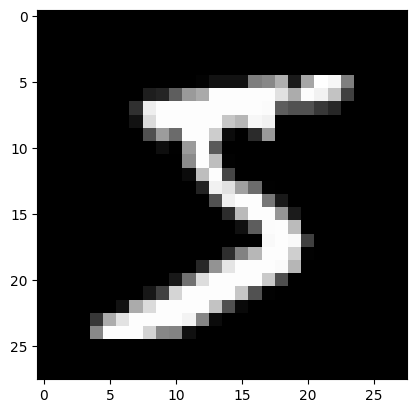

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)    

Label: 3


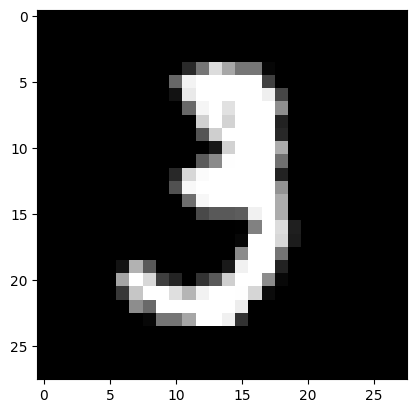

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (image and lables)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


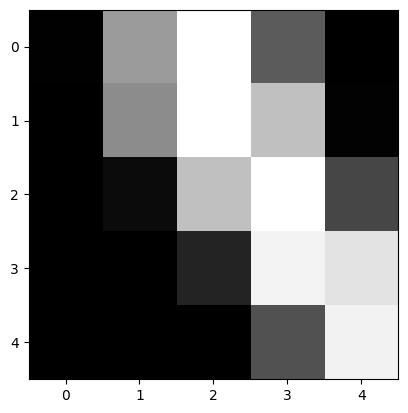

In [13]:
# plot the image by passing inthe 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic Regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0130, -0.0340,  0.0033,  ..., -0.0294,  0.0049, -0.0236],
        [-0.0105, -0.0087,  0.0011,  ..., -0.0232,  0.0016,  0.0105],
        [ 0.0227, -0.0160, -0.0219,  ..., -0.0235, -0.0198,  0.0249],
        ...,
        [-0.0164,  0.0068,  0.0012,  ..., -0.0071, -0.0115,  0.0345],
        [-0.0224, -0.0204, -0.0218,  ..., -0.0057, -0.0136,  0.0170],
        [-0.0291,  0.0163,  0.0020,  ...,  0.0214, -0.0179,  0.0044]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0096,  0.0329,  0.0152, -0.0283, -0.0147,  0.0030,  0.0087,  0.0027,
        -0.0182, -0.0036], requires_grad=True)

In [ ]:
images.shape

AttributeError: 'Image' object has no attribute 'shape'

In [21]:
images.reshape(128, 784).shape

NameError: name 'images' is not defined

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0330,  0.0145, -0.0149,  ..., -0.0045, -0.0284,  0.0056],
         [ 0.0286, -0.0217, -0.0080,  ..., -0.0027,  0.0101, -0.0206],
         [-0.0264, -0.0293, -0.0039,  ...,  0.0228, -0.0171, -0.0283],
         ...,
         [-0.0324,  0.0265,  0.0010,  ...,  0.0240, -0.0214, -0.0334],
         [ 0.0122, -0.0056, -0.0239,  ...,  0.0095,  0.0032, -0.0328],
         [-0.0179,  0.0326,  0.0298,  ...,  0.0039,  0.0330,  0.0061]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0303, -0.0051,  0.0171, -0.0183,  0.0008,  0.0072,  0.0015, -0.0271,
          0.0272,  0.0324], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    break
print(images.shape)
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.3909, -0.1327,  0.1045,  0.2295, -0.1559,  0.3554, -0.1409, -0.2239,
          0.0185,  0.4125],
        [-0.4675, -0.0569, -0.0009, -0.0657, -0.0347,  0.1540,  0.0029, -0.0571,
         -0.0780,  0.0236]])


In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

tensor([[-0.3909, -0.1327,  0.1045,  0.2295, -0.1559,  0.3554, -0.1409, -0.2239,
          0.0185,  0.4125],
        [-0.4675, -0.0569, -0.0009, -0.0657, -0.0347,  0.1540,  0.0029, -0.0571,
         -0.0780,  0.0236]], grad_fn=<SliceBackward0>)

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

#look at sample probabilities
print("Sample Probabilities:\n", probs[:2].data)

#add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample Probabilities:
 tensor([[0.0650, 0.0842, 0.1067, 0.1210, 0.0823, 0.1372, 0.0835, 0.0769, 0.0979,
         0.1453],
        [0.0657, 0.0991, 0.1048, 0.0982, 0.1013, 0.1223, 0.1052, 0.0990, 0.0970,
         0.1074]])
Sum:  0.9999999403953552


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 5, 8, 5, 5, 8, 3, 7, 3, 9, 5, 9, 5, 5, 5, 8, 6, 9, 5, 3, 3, 1, 9, 8,
        9, 5, 5, 9, 9, 3, 5, 9, 1, 9, 3, 3, 9, 5, 5, 3, 3, 9, 3, 1, 5, 9, 3, 9,
        6, 5, 5, 8, 2, 9, 2, 9, 8, 5, 5, 9, 5, 5, 2, 6, 9, 5, 2, 3, 9, 7, 2, 8,
        8, 9, 9, 3, 2, 9, 5, 5, 9, 5, 3, 5, 1, 5, 5, 2, 5, 3, 2, 9, 9, 2, 5, 9,
        3, 6, 5, 8, 5, 9, 9, 8, 5, 5, 9, 5, 5, 3, 5, 8, 8, 3, 9, 5, 5, 1, 9, 5,
        9, 8, 5, 5, 8, 9, 3, 5])
tensor([0.1453, 0.1223, 0.1230, 0.1296, 0.1247, 0.1372, 0.1541, 0.1156, 0.1336,
        0.1361, 0.1355, 0.1189, 0.1429, 0.1310, 0.1391, 0.1373, 0.1187, 0.1295,
        0.1362, 0.1121, 0.1310, 0.1319, 0.1283, 0.1222, 0.1173, 0.1269, 0.1429,
        0.1413, 0.1271, 0.1192, 0.1233, 0.1232, 0.1179, 0.1242, 0.1333, 0.1226,
        0.1375, 0.1350, 0.1172, 0.1176, 0.1261, 0.1341, 0.1370, 0.1502, 0.1398,
        0.1302, 0.1353, 0.1413, 0.1320, 0.1185, 0.1336, 0.1462, 0.1328, 0.1298,
        0.1319, 0.1404, 0.1337, 0.1342, 0.1437, 0.1325, 0.1256, 0.1316, 0.1265,
       

In [ ]:
labels

tensor([9, 6, 1, 5, 0, 6, 4, 3, 9, 8, 1, 4, 4, 9, 2, 0, 1, 9, 7, 6, 3, 5, 7, 2,
        8, 0, 4, 7, 8, 3, 7, 4, 1, 3, 0, 5, 9, 4, 7, 8, 1, 9, 6, 8, 6, 8, 5, 8,
        3, 6, 6, 2, 0, 4, 7, 4, 4, 6, 6, 8, 9, 7, 5, 4, 8, 2, 5, 5, 7, 3, 5, 0,
        2, 9, 8, 5, 5, 7, 1, 8, 8, 5, 6, 4, 3, 3, 6, 5, 3, 4, 0, 5, 5, 0, 7, 4,
        5, 4, 7, 2, 1, 6, 7, 2, 4, 0, 5, 7, 7, 0, 6, 8, 2, 6, 7, 9, 2, 1, 1, 1,
        1, 2, 1, 8, 4, 8, 5, 8])

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0938)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
#loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3316, grad_fn=<NllLossBackward0>)


In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = []# for recording epoch-wise results
    for epoch in range(epochs):

        # training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation Phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)  #generating predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  #generate predictions
        loss = F.cross_entropy(out, labels)  #calculate loss
        acc = accuracy(out, labels)    #calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  #Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()   # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3439512252807617, 'val_acc': 0.061214398592710495}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9646, val_acc: 0.6340
Epoch [1], val_loss: 1.6869, val_acc: 0.7464
Epoch [2], val_loss: 1.4799, val_acc: 0.7791
Epoch [3], val_loss: 1.3239, val_acc: 0.7951
Epoch [4], val_loss: 1.2042, val_acc: 0.8065


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1104, val_acc: 0.8157
Epoch [1], val_loss: 1.0353, val_acc: 0.8216
Epoch [2], val_loss: 0.9740, val_acc: 0.8275
Epoch [3], val_loss: 0.9229, val_acc: 0.8322
Epoch [4], val_loss: 0.8799, val_acc: 0.8352


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8430, val_acc: 0.8379
Epoch [1], val_loss: 0.8111, val_acc: 0.8426
Epoch [2], val_loss: 0.7832, val_acc: 0.8445
Epoch [3], val_loss: 0.7586, val_acc: 0.8476
Epoch [4], val_loss: 0.7367, val_acc: 0.8499


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7171, val_acc: 0.8523
Epoch [1], val_loss: 0.6994, val_acc: 0.8539
Epoch [2], val_loss: 0.6834, val_acc: 0.8554
Epoch [3], val_loss: 0.6688, val_acc: 0.8565
Epoch [4], val_loss: 0.6554, val_acc: 0.8578


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

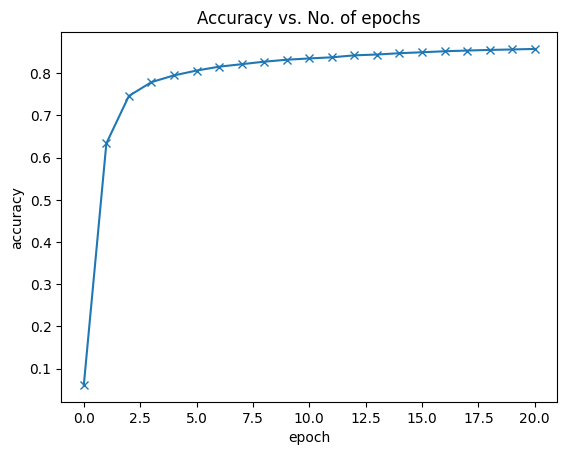

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [ ]:
#define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


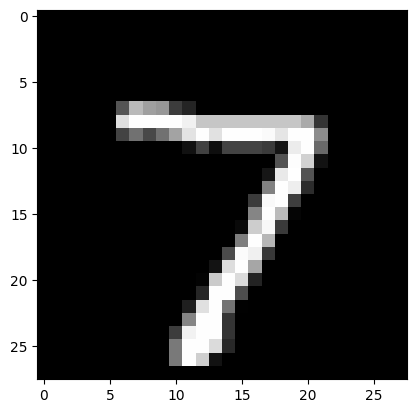

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


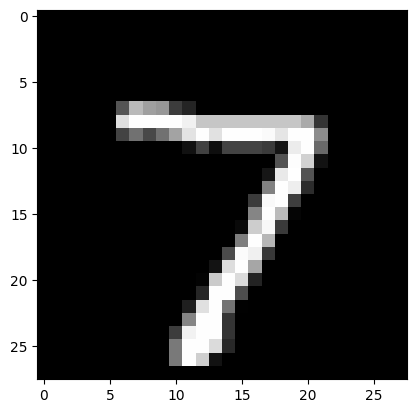

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


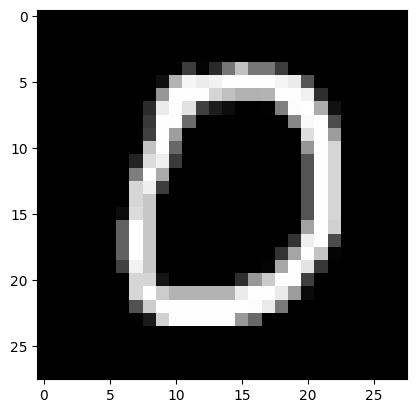

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


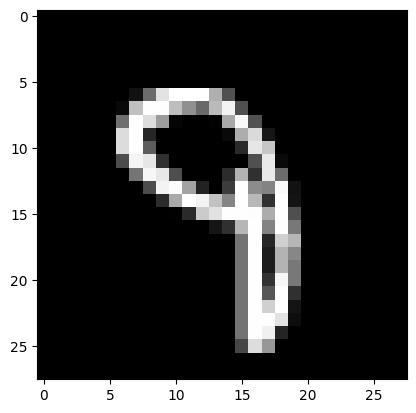

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


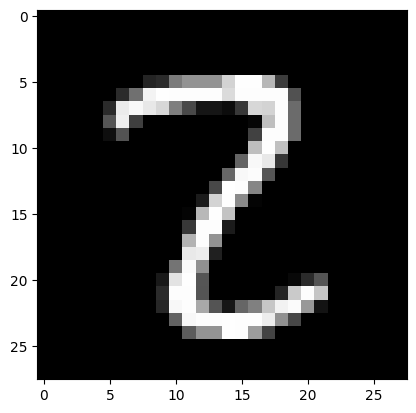

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6400676965713501, 'val_acc': 0.862011730670929}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-2.8770e-02, -5.0901e-03, -1.6039e-02,  ...,  1.2760e-02,
                       -1.3160e-02, -2.0325e-02],
                      [ 2.4547e-02,  3.0880e-02, -5.4345e-04,  ..., -3.1873e-02,
                       -2.0113e-03,  3.1615e-02],
                      [ 2.5785e-02, -2.0950e-02, -1.9650e-02,  ...,  1.8533e-02,
                       -1.3394e-03, -2.6976e-02],
                      ...,
                      [-1.2510e-02, -6.0458e-03, -9.9200e-03,  ..., -8.4636e-03,
                        1.6081e-02,  9.2293e-03],
                      [ 7.3324e-03, -2.5319e-03,  1.1647e-02,  ...,  6.3937e-04,
                        3.3936e-02, -2.8955e-02],
                      [ 1.3015e-02,  2.7678e-02,  2.6593e-02,  ..., -2.1061e-02,
                       -6.3460e-05,  2.9945e-02]])),
             ('linear.bias',
              tensor([-0.0306,  0.0921, -0.0540, -0.0572,  0.0347,  0.0083, -0.0277,  0.0158,
                      -0.0799,

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6400676965713501, 'val_acc': 0.862011730670929}